In [3]:
from prophet import Prophet

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

## Data Preprocessing

In [23]:
csv_file = 'Superstore_csv.csv'
dataframe = pd.read_csv(csv_file)

In [4]:
dataframe.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
dataframe.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [24]:
dataframe['Order Date']= pd.to_datetime(dataframe['Order Date'], format="%d/%m/%Y") #convert Order Date to datetime format
dataframe.sort_values("Order Date", axis=0, ascending=True, inplace=True) #sort by Order Date

Check for seasonality in different categories

C:\Users\Bir\AppData\Local\Temp\ipykernel_18204\3079191891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_technology.drop(["Ship Mode", "Segment", "Country", "Postal Code", "Region", "Sub-Category", "Product Name", "City", "State", "Discount", "Profit", "Row ID", "Quantity", "Order ID", "Ship Date", "Customer ID", "Customer Name", "Product ID", "Category"], axis=1, inplace=True)


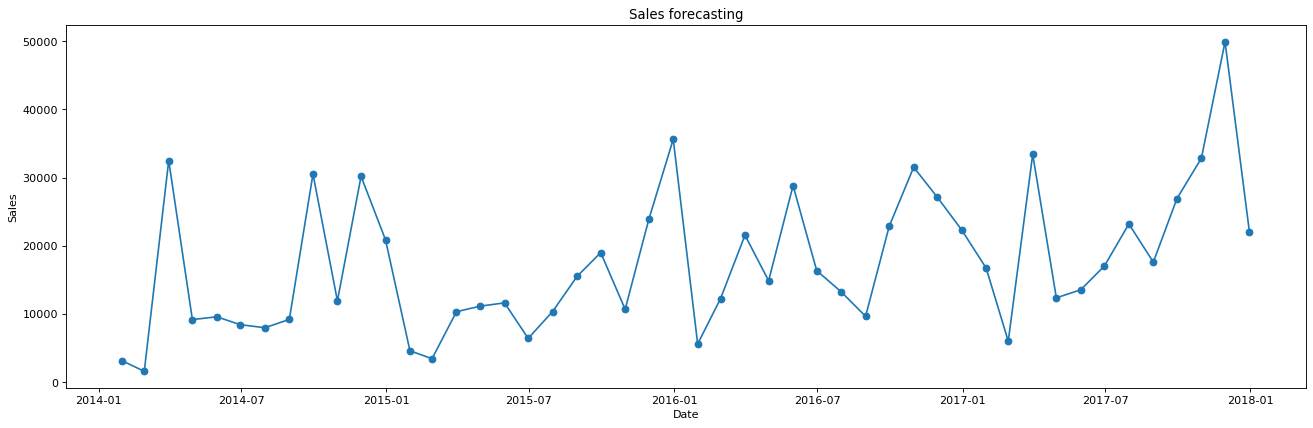

In [8]:
dataframe_technology = dataframe[dataframe['Category'] == "Technology"]
dataframe_technology.drop(["Ship Mode", "Segment", "Country", "Postal Code", "Region", "Sub-Category", "Product Name", "City", "State", "Discount", "Profit", "Row ID", "Quantity", "Order ID", "Ship Date", "Customer ID", "Customer Name", "Product ID", "Category"], axis=1, inplace=True) 
dataframe_technology = dataframe_technology.set_index('Order Date').resample('M').sum() #aggregate into monthly data

#Plot Data

from matplotlib.pyplot import figure
figure(figsize = (20, 6), dpi = 80)
plt.plot(dataframe_technology["Sales"], marker='o')

# Labelling 
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales forecasting")

# Display
plt.show()

#Based on below graph, no seasonality identified for furniture category

C:\Users\Bir\AppData\Local\Temp\ipykernel_18204\4259117987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_office.drop(["Ship Mode", "Segment", "Country", "Postal Code", "Region", "Sub-Category", "Product Name", "City", "State", "Discount", "Profit", "Row ID", "Quantity", "Order ID", "Ship Date", "Customer ID", "Customer Name", "Product ID", "Category"], axis=1, inplace=True)


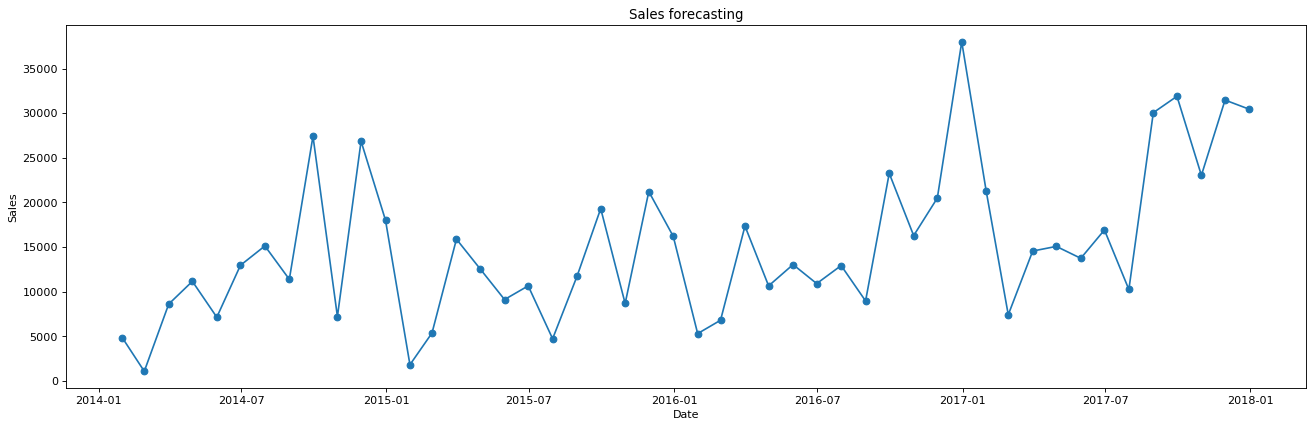

In [9]:
dataframe_office = dataframe[dataframe['Category'] == "Office Supplies"]
dataframe_office.drop(["Ship Mode", "Segment", "Country", "Postal Code", "Region", "Sub-Category", "Product Name", "City", "State", "Discount", "Profit", "Row ID", "Quantity", "Order ID", "Ship Date", "Customer ID", "Customer Name", "Product ID", "Category"], axis=1, inplace=True) 
dataframe_office = dataframe_office.set_index('Order Date').resample('M').sum() #aggregate into monthly data

#Plot Data

from matplotlib.pyplot import figure
figure(figsize = (20, 6), dpi = 80)
plt.plot(dataframe_office["Sales"], marker='o')

# Labelling 
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales forecasting")

# Display
plt.show()

#Based on below graph, no seasonality identified for office supplies category

C:\Users\Bir\AppData\Local\Temp\ipykernel_18204\3451839684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_furniture.drop(["Ship Mode", "Segment", "Country", "Postal Code", "Region", "Sub-Category", "Product Name", "City", "State", "Discount", "Profit", "Row ID", "Quantity", "Order ID", "Ship Date", "Customer ID", "Customer Name", "Product ID", "Category"], axis=1, inplace=True)


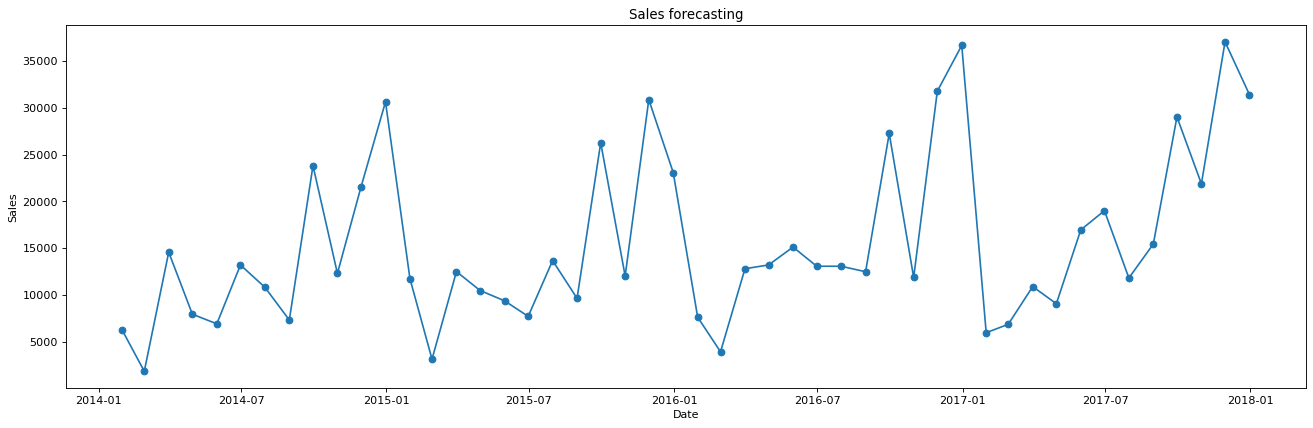

In [10]:
dataframe_furniture = dataframe[dataframe['Category'] == "Furniture"]
dataframe_furniture.drop(["Ship Mode", "Segment", "Country", "Postal Code", "Region", "Sub-Category", "Product Name", "City", "State", "Discount", "Profit", "Row ID", "Quantity", "Order ID", "Ship Date", "Customer ID", "Customer Name", "Product ID", "Category"], axis=1, inplace=True) 
dataframe_furniture = dataframe_furniture.set_index('Order Date').resample('M').sum() #aggregate into monthly data

#Plot Data

from matplotlib.pyplot import figure
figure(figsize = (20, 6), dpi = 80)
plt.plot(dataframe_furniture["Sales"], marker='o')

# Labelling 
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales forecasting")

# Display
plt.show()

#Based on below graph, seasonality identified for furniture category. Furniture sales tend to peak at the end of each year, and then decline after the holidays. 
#Therefore will continue with just Furniture category

In [25]:
dataframe = dataframe[dataframe['Category'] == "Furniture"] #only include Furniture items

In [26]:
#Remove columns not needed for time series analysis
dataframe.drop(["Ship Mode", "Segment", "Country", "Postal Code", "Region", "Sub-Category", "Product Name", "City", "State", "Discount", "Profit", "Row ID", "Quantity", "Order ID", "Ship Date", "Customer ID", "Customer Name", "Product ID", "Category"], axis=1, inplace=True)  

In [27]:
dataframe.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [10]:
#Look for missing values
dataframe.isnull().values.any()

False

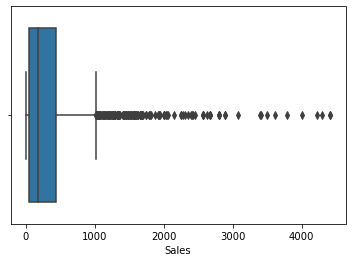

In [11]:
#Identify outliers using box plot
sns.boxplot(x=dataframe['Sales']) 

#from below info, some outliers identified

In [12]:
#Identify outliers using z score
from scipy import stats
z = np.abs(stats.zscore(dataframe['Sales']))
threshold = 3
print(np.where(z > 3))

#from below info, 45 outliers identified

(array([   0,  110,  216,  246,  316,  352,  368,  395,  431,  433,  470,
        537,  583,  673,  674,  675,  713,  739,  749,  809,  810,  811,
       1022, 1028, 1102, 1124, 1165, 1301, 1343, 1372, 1400, 1426, 1568,
       1620, 1738, 1799, 1820, 1823, 1851, 1874, 1881, 1916, 1934, 1951,
       2007], dtype=int64),)


In [13]:
print(dataframe.iloc[[0,  110,  216,  246,  316,  352,  368,  395,  431,  433,  470,
        537,  583,  673,  674,  675,  713,  739,  749,  809,  810,  811,
       1022, 1028, 1102, 1124, 1165, 1301, 1343, 1372, 1400, 1426, 1568,
       1620, 1738, 1799, 1820, 1823, 1851, 1874, 1881, 1916, 1934, 1951,
       2007]])

     Order Date      Sales
7474 2014-01-06  2573.8200
244  2014-06-01  2001.8600
9425 2014-09-12  3785.2920
5626 2014-09-29  2348.8200
6535 2014-11-17  4007.8400
1791 2014-12-01  2807.8400
1246 2014-12-12  3610.8480
1155 2014-12-20  2244.4800
9412 2015-01-27  2803.9200
9639 2015-01-28  4297.6440
9857 2015-03-26  3393.6800
6884 2015-05-31  2567.8400
1701 2015-07-13  1931.0400
27   2015-09-17  3083.4300
5918 2015-09-17  2003.9200
5917 2015-09-17  4228.7040
1438 2015-10-15  2453.4300
9056 2015-11-02  2621.3220
9741 2015-11-08  4404.9000
6881 2015-12-01  1913.4000
8892 2015-12-01  2676.6720
6879 2015-12-01  2003.9200
5170 2016-05-27  3504.9000
5300 2016-05-30  2275.5000
3580 2016-07-25  2430.0800
6868 2016-08-21  2887.0560
399  2016-09-08  2396.2656
8468 2016-11-11  2678.9400
9649 2016-11-26  3406.6640
149  2016-12-05  1951.8400
3770 2016-12-17  2003.5200
8271 2016-12-25  2563.0560
8236 2017-05-01  2803.9200
9947 2017-06-01  1925.8800
7243 2017-08-17  4416.1740
3043 2017-09-11  2054.2720
6

The majority of the outliers appear to be during the end of year season when sales are expected to be significantly higher. Because of this, I have decided not to exclude them from the dataset.

In [17]:
dataframe = dataframe.set_index('Order Date').resample('M', origin='2014-01-06').sum() #aggregate into monthly data

In [18]:
dataframe

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


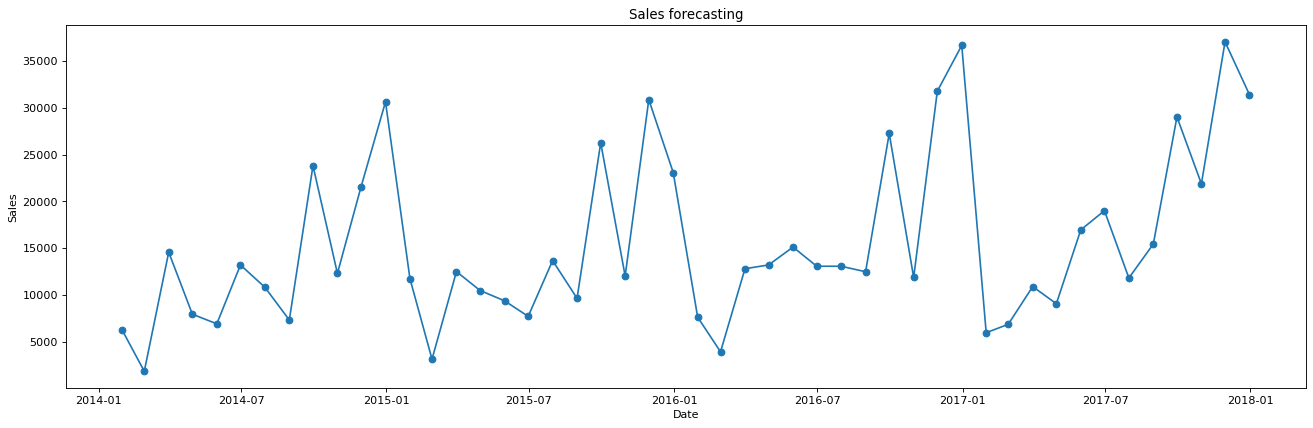

In [16]:
#Plot Data

from matplotlib.pyplot import figure
figure(figsize = (20, 6), dpi = 80)
plt.plot(dataframe["Sales"], marker='o')

# Labelling 
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales forecasting")

# Display
plt.show()

Separate into train and test data

In [17]:
dataframe_train = dataframe.drop(dataframe.index[-12:])
dataframe_test = dataframe.drop(dataframe.index[:-12])

## Prophet Models

In [335]:
df_prophet = dataframe_train.copy()

In [336]:
df_prophet.columns

Index(['Sales'], dtype='object')

In [337]:
df_prophet = df_prophet.reset_index(level=0) #removes the Order Date as the index

In [338]:
df_prophet.columns

Index(['Order Date', 'Sales'], dtype='object')

In [339]:
df_prophet.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True) #change names of columns to be compatible with Prophet

In [340]:
df_prophet.columns

Index(['ds', 'y'], dtype='object')

In [341]:
df_prophet.head()

,ds,y
0,2014-01-31,6242.525
1,2014-02-28,1839.658
2,2014-03-31,14573.956
3,2014-04-30,7944.837
4,2014-05-31,6912.787


Train Prophet model

In [342]:
m1 = Prophet(interval_width=0.95) #interval_width is confidence interval size 
prophet_model_1 = m1.fit(df_prophet)

19:57:54 - cmdstanpy - INFO - Chain [1] start processing
19:57:55 - cmdstanpy - INFO - Chain [1] done processing


Forecast

In [343]:
future = m1.make_future_dataframe(periods=12,freq='M') #'M' for month end
forecast = m1.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
43,2017-08-31,17674.358611,9503.484076,16981.888819,17674.214429,17674.515320,-4408.677599,-4408.677599,-4408.677599,-4408.677599,-4408.677599,-4408.677599,0.0,0.0,0.0,13265.681011
44,2017-09-30,17807.880811,25381.054526,32242.100335,17807.711102,17808.063225,10932.171109,10932.171109,10932.171109,10932.171109,10932.171109,10932.171109,0.0,0.0,0.0,28740.051920
45,2017-10-31,17945.853750,10845.689969,18051.150891,17945.653537,17946.061244,-3377.788168,-3377.788168,-3377.788168,-3377.788168,-3377.788168,-3377.788168,0.0,0.0,0.0,14568.065582
46,2017-11-30,18079.375950,27821.328378,34884.737561,18079.144494,18079.613831,13162.954846,13162.954846,13162.954846,13162.954846,13162.954846,13162.954846,0.0,0.0,0.0,31242.330796
47,2017-12-31,18217.348890,31798.039235,39478.240044,18217.081195,18217.612805,17205.319698,17205.319698,17205.319698,17205.319698,17205.319698,17205.319698,0.0,0.0,0.0,35422.668588


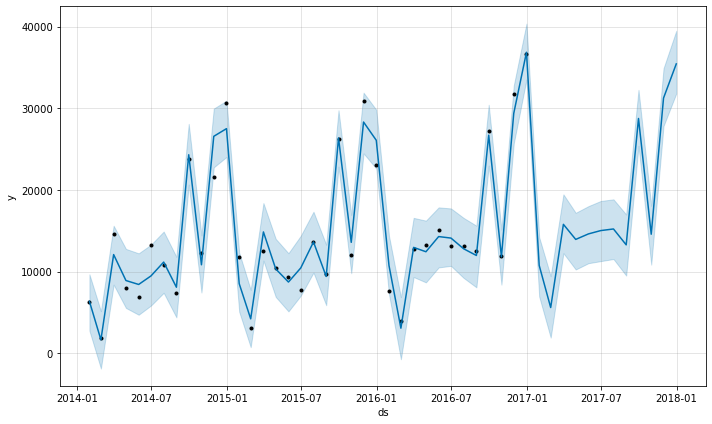

In [344]:
plot = m1.plot(forecast)

In [345]:
#extract the predicted values
prophet_1_predicted = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
prophet_1_predicted.drop(prophet_1_predicted.index[:-12], inplace=True) #gets data from last 12 months only (the predicted values)

C:\Users\Bir\AppData\Local\Temp\ipykernel_15040\2063688046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_1_predicted.drop(prophet_1_predicted.index[:-12], inplace=True) #gets data from last 12 months only (the predicted values)


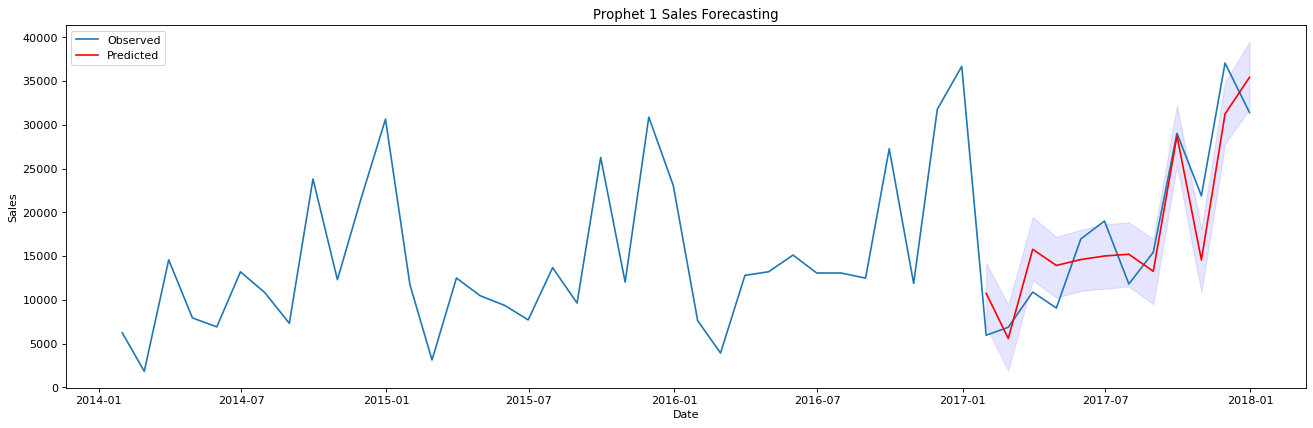

In [346]:
#Plot actual and predicted on the same graph

from matplotlib.pyplot import figure
figure(figsize = (20, 6), dpi = 80)
plt.plot(dataframe["Sales"], label="Observed")
plt.plot(prophet_1_predicted["ds"], prophet_1_predicted["yhat"], label="Predicted", color='r')
plt.fill_between(prophet_1_predicted["ds"], prophet_1_predicted["yhat_lower"], prophet_1_predicted["yhat_upper"], color='blue', alpha=0.1)
plt.legend(loc="upper left")

#Labelling 
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Prophet 1 Sales Forecasting")

#Display
plt.savefig('prophet1.png')
plt.show()

Calculate Error Functions

In [347]:
dataframe_test.reset_index(drop=True, inplace=True) #need to remove index in order to join together datafames
prophet_1_error = dataframe_test.copy()

In [348]:
prophet_1_predicted.reset_index(drop=True, inplace=True) #need to remove index in order to join together datafames
prophet_1_error = prophet_1_error.join(prophet_1_predicted["yhat"])

In [349]:
prophet_1_error

,Sales,yhat
0,5964.0320,10749.579831
1,6866.3374,5591.366561
2,10893.4448,15777.037100
3,9065.9581,13932.070635
4,16957.5582,14605.716776
5,19008.5867,15012.734509
6,11813.0220,15211.005382
7,15441.8740,13265.681011
8,29028.2060,28740.051920
9,21884.0682,14568.065582


In [350]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mse = mean_squared_error(prophet_1_error["Sales"],prophet_1_error["yhat"])
rmse = mean_squared_error(prophet_1_error["Sales"],prophet_1_error["yhat"], squared=False)
mape = mean_absolute_percentage_error(prophet_1_error["Sales"],prophet_1_error["yhat"])
print("MSE:", mse, "RMSE:", rmse, "MAPE:", mape)

MSE: 17780956.63194002 RMSE: 4216.747162439316 MAPE: 0.2816330184524267


In [351]:
from prophet.serialize import model_to_json, model_from_json

with open('prophet1.json', 'w') as fout:
    fout.write(model_to_json(m1))

Prophet with Holiday Information

In [352]:
superbowl = pd.DataFrame({
  'holiday': 'Superbowl',
  'ds': pd.to_datetime(['2014-01-31', '2015-01-31', '2016-01-31', '2017-01-31']),
})

labour_day = pd.DataFrame({
  'holiday': 'Labour Day',
  'ds': pd.to_datetime(['2014-04-30', '2015-04-30', '2016-04-30', '2017-04-30']),
})

memorial_day = pd.DataFrame({
  'holiday': 'Memorial Day',
  'ds': pd.to_datetime(['2014-05-31', '2015-05-31', '2016-05-31', '2017-05-31']),
})

independence_day = pd.DataFrame({
  'holiday': 'Independence Day',
  'ds': pd.to_datetime(['2014-06-30', '2015-06-30', '2016-06-30', '2017-06-30']),
})

veterans_day = pd.DataFrame({
  'holiday': 'Veterans Day',
  'ds': pd.to_datetime(['2014-10-31', '2015-10-31', '2016-10-31', '2017-10-31']),
})

halloween = pd.DataFrame({
  'holiday': 'Halloween',
  'ds': pd.to_datetime(['2014-10-31', '2015-10-31', '2016-10-31', '2017-10-31']),
})

thanksgiving = pd.DataFrame({
  'holiday': 'Thanksgiving',
  'ds': pd.to_datetime(['2014-11-30', '2015-11-30', '2016-11-30', '2017-11-30']),
})

christmas = pd.DataFrame({
  'holiday': 'Christmas',
  'ds': pd.to_datetime(['2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31']),
})

new_years = pd.DataFrame({
  'holiday': 'New Years',
  'ds': pd.to_datetime(['2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31']),
})

holidays = pd.concat((superbowl, memorial_day, labour_day, independence_day, veterans_day, thanksgiving, christmas, new_years))

In [353]:
holidays

,holiday,ds
0,Superbowl,2014-01-31
1,Superbowl,2015-01-31
2,Superbowl,2016-01-31
3,Superbowl,2017-01-31
0,Memorial Day,2014-05-31
1,Memorial Day,2015-05-31
2,Memorial Day,2016-05-31
3,Memorial Day,2017-05-31
0,Labour Day,2014-04-30
1,Labour Day,2015-04-30


In [354]:
#Train Prophet model with holiday info
m2 = Prophet(interval_width=0.95, yearly_seasonality=15, holidays=holidays) #interval_width is confidence interval size 
prophet_model_2 = m2.fit(df_prophet)

19:58:08 - cmdstanpy - INFO - Chain [1] start processing
19:58:09 - cmdstanpy - INFO - Chain [1] done processing


In [355]:
#Forecast
future = m2.make_future_dataframe(periods=12,freq='M')
forecast = m2.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Independence Day,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
43,2017-08-31,-38172.883551,9519.580426,15328.781277,-38172.972507,-38172.804369,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,50513.573731,50513.573731,50513.573731,0.0,0.0,0.0,12340.690180
44,2017-09-30,-38068.516907,25249.724746,30978.327134,-38068.620222,-38068.423518,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,66164.831923,66164.831923,66164.831923,0.0,0.0,0.0,28096.315016
45,2017-10-31,-37960.671375,10659.494356,16432.777535,-37960.791505,-37960.560851,0.000000,0.000000,0.000000,0.0,...,-40839.181642,-40839.181642,-40839.181642,92455.326260,92455.326260,92455.326260,0.0,0.0,0.0,13655.473243
46,2017-11-30,-37856.304731,26781.496145,32820.172543,-37856.444688,-37856.177474,0.000000,0.000000,0.000000,0.0,...,179513.333740,179513.333740,179513.333740,-111769.091774,-111769.091774,-111769.091774,0.0,0.0,0.0,29887.937235
47,2017-12-31,-37748.459199,32789.127882,38356.925299,-37748.618382,-37748.310949,-97519.900293,-97519.900293,-97519.900293,0.0,...,-195039.800587,-195039.800587,-195039.800587,268309.526787,268309.526787,268309.526787,0.0,0.0,0.0,35521.267001


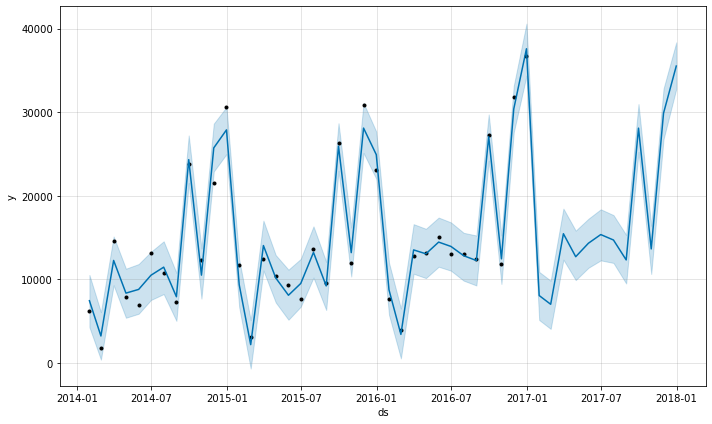

In [356]:
#plot
plot = m2.plot(forecast)

In [357]:
#extract the predicted values
prophet_2_predicted = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
prophet_2_predicted.drop(prophet_2_predicted.index[:-12], inplace=True) #gets data from last 12 months only (the predicted values)

C:\Users\Bir\AppData\Local\Temp\ipykernel_15040\2220768938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_2_predicted.drop(prophet_2_predicted.index[:-12], inplace=True) #gets data from last 12 months only (the predicted values)


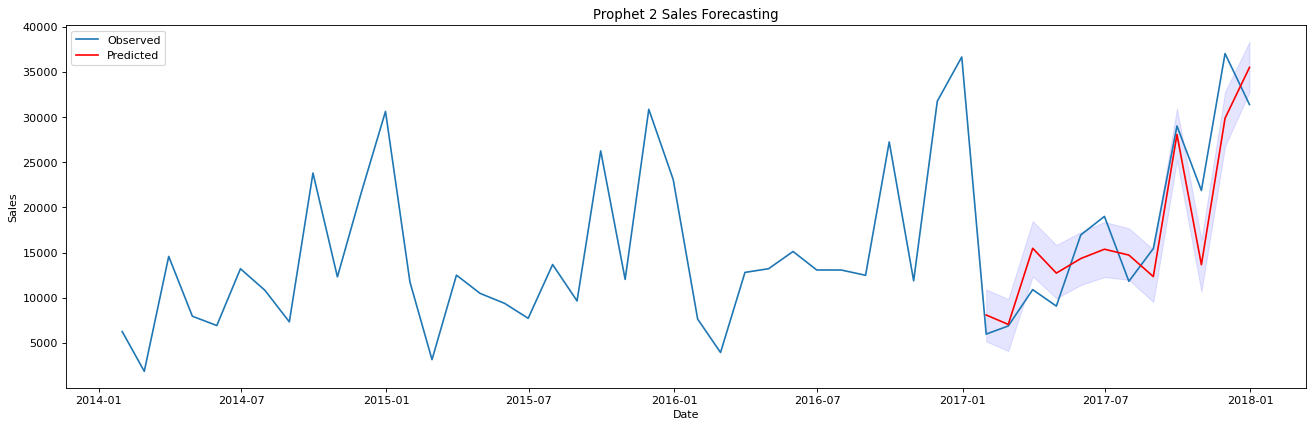

In [358]:
#Plot actual and predicted on the same graph

from matplotlib.pyplot import figure
figure(figsize = (20, 6), dpi = 80)
plt.plot(dataframe["Sales"], label="Observed")
plt.plot(prophet_2_predicted["ds"], prophet_2_predicted["yhat"], label="Predicted", color='r')
plt.fill_between(prophet_2_predicted["ds"], prophet_2_predicted["yhat_lower"], prophet_2_predicted["yhat_upper"], color='blue', alpha=0.1)
plt.legend(loc="upper left")

#Labelling 
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Prophet 2 Sales Forecasting")

#Display
plt.savefig('prophet2.png')
plt.show()

In [359]:
#Calcuate Error Functions
dataframe_test.reset_index(drop=True, inplace=True) #need to remove index in order to join together datafames
prophet_2_error = dataframe_test.copy()

prophet_2_predicted.reset_index(drop=True, inplace=True) #need to remove index in order to join together datafames
prophet_2_error = prophet_2_error.join(prophet_2_predicted["yhat"])

prophet_2_error

,Sales,yhat
0,5964.0320,8081.174364
1,6866.3374,7036.932055
2,10893.4448,15473.430142
3,9065.9581,12725.116491
4,16957.5582,14337.407637
5,19008.5867,15372.222807
6,11813.0220,14721.403278
7,15441.8740,12340.690180
8,29028.2060,28096.315016
9,21884.0682,13655.473243


In [360]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mse = mean_squared_error(prophet_2_error["Sales"],prophet_2_error["yhat"])
rmse = mean_squared_error(prophet_2_error["Sales"],prophet_2_error["yhat"], squared=False)
mape = mean_absolute_percentage_error(prophet_2_error["Sales"],prophet_2_error["yhat"])
print("MSE:", mse, "RMSE:", rmse, "MAPE:", mape)

MSE: 17827864.73153146 RMSE: 4222.305617968867 MAPE: 0.22743931033047418


In [361]:
from prophet.serialize import model_to_json, model_from_json

with open('prophet2.json', 'w') as fout:
    fout.write(model_to_json(m2))

## LSTM Models

In [18]:
df_lstm_train = dataframe_train.copy()
df_lstm_test = dataframe_test.copy()

In [19]:
#Scale the data to between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_lstm_train) #fit the scaler only on training data
scaled_train = scaler.transform(df_lstm_train)
scaled_test = scaler.transform(df_lstm_test)

In [20]:
scaled_train[:5]

array([[0.12637733],
       [0.        ],
       [0.36551787],
       [0.1752395 ],
       [0.14561614]])

In [21]:
scaled_test[:5]

array([[0.11838363],
       [0.14428288],
       [0.25987462],
       [0.20741951],
       [0.4339354 ]])

Define the Generator. This will convert the data into a format that is compatible with an LSTM

In [22]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
n_input = 12 #we will use the last 12 months to predict the next month
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1) #univariate data so first two parameters (X, y) are the same

In [24]:
#This shows what we've converted the dataset into. So the first element of dataset noww contains n_input (3) datapoints, and the label (the value to predict) is the next datapoint
X1, y1 = generator[0]
X2, y2 = generator[1]
print("X1: \n", X1)
print("y1: \n", y1)
print("X2: \n", X2)
print("y2: \n", y2)

X1: 
 [[[0.12637733]
  [0.        ]
  [0.36551787]
  [0.1752395 ]
  [0.14561614]
  [0.32625647]
  [0.25779667]
  [0.15731449]
  [0.63080992]
  [0.30036947]
  [0.56618107]
  [0.8268395 ]]]
y1: 
 [[0.28417197]]
X2: 
 [[[0.        ]
  [0.36551787]
  [0.1752395 ]
  [0.14561614]
  [0.32625647]
  [0.25779667]
  [0.15731449]
  [0.63080992]
  [0.30036947]
  [0.56618107]
  [0.8268395 ]
  [0.28417197]]]
y2: 
 [[0.03716277]]


In [26]:
X1.shape

(1, 12, 1)

Create the model

In [304]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [317]:
model = Sequential()
model.add(LSTM(units=32, activation='relu', dropout=0.1, input_shape=(n_input, n_features)))  
model.add(Dense(units=1))

In [318]:
model.compile(loss='mse', optimizer='adam')

In [319]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 32)                4352      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


Fit the model

In [320]:
model.fit(generator,epochs=200)

Epoch 1/200
24/24 [==============================] - 3s 9ms/step - loss: 0.1759
Epoch 2/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0886
Epoch 3/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0692
Epoch 4/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0651
Epoch 5/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0656
Epoch 6/200
24/24 [==============================] - 0s 9ms/step - loss: 0.0664
Epoch 7/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0714
Epoch 8/200
24/24 [==============================] - 0s 9ms/step - loss: 0.0649
Epoch 9/200
24/24 [==============================] - 0s 9ms/step - loss: 0.0640
Epoch 10/200
24/24 [==============================] - 0s 9ms/step - loss: 0.0681
Epoch 11/200
24/24 [==============================] - 0s 9ms/step - loss: 0.0645
Epoch 12/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0622
Epoch 13/200
24/24 [=================

24/24 [==============================] - 0s 8ms/step - loss: 0.0419
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0511
Epoch 104/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0216
Epoch 105/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0247
Epoch 106/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0273
Epoch 107/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0264
Epoch 108/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0384
Epoch 109/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0277
Epoch 110/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0356
Epoch 111/200
24/24 [==============================] - 0s 9ms/step - loss: 0.0263
Epoch 112/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0621
Epoch 113/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0275
Epoch 114/200
24/24 [=======

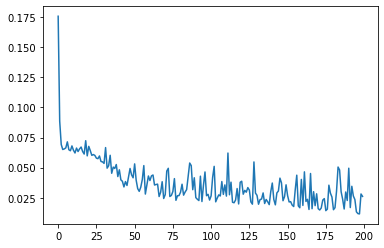

In [321]:
#Plot the loss per epoch
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Make predictions using test data

In [322]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(scaled_test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [323]:
test_predictions

[array([0.21966521], dtype=float32),
 array([0.21086584], dtype=float32),
 array([0.22136596], dtype=float32),
 array([0.22940923], dtype=float32),
 array([0.25973403], dtype=float32),
 array([0.25035444], dtype=float32),
 array([0.26962784], dtype=float32),
 array([0.29515553], dtype=float32),
 array([0.7074543], dtype=float32),
 array([0.34235087], dtype=float32),
 array([0.68047434], dtype=float32),
 array([0.7048226], dtype=float32)]

In [324]:
#unscale the predictions on the test set
true_predictions = scaler.inverse_transform(test_predictions)

In [325]:
evaluation_df = df_lstm_test.copy()
evaluation_df.reset_index(drop=True, inplace=True) 

In [326]:
evaluation_df['yhat'] = true_predictions

In [327]:
evaluation_df

,Sales,yhat
0,5964.0320,9492.586926
1,6866.3374,9186.025030
2,10893.4448,9551.839244
3,9065.9581,9832.059336
4,16957.5582,10888.546834
5,19008.5867,10561.770571
6,11813.0220,11233.237663
7,15441.8740,12122.598167
8,29028.2060,26486.699511
9,21884.0682,13766.839487


In [328]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mse = mean_squared_error(evaluation_df["Sales"],evaluation_df["yhat"])
rmse = mean_squared_error(evaluation_df["Sales"],evaluation_df["yhat"], squared=False)
mape = mean_absolute_percentage_error(evaluation_df["Sales"],evaluation_df["yhat"])
print("MSE:", mse, "RMSE:", rmse, "MAPE:", mape)

MSE: 30808886.178497538 RMSE: 5550.575301578886 MAPE: 0.2610084111201089


In [329]:
plotting_df = df_lstm_test.copy()
plotting_df['yhat'] = true_predictions
plotting_df.drop("Sales", axis=1, inplace=True)

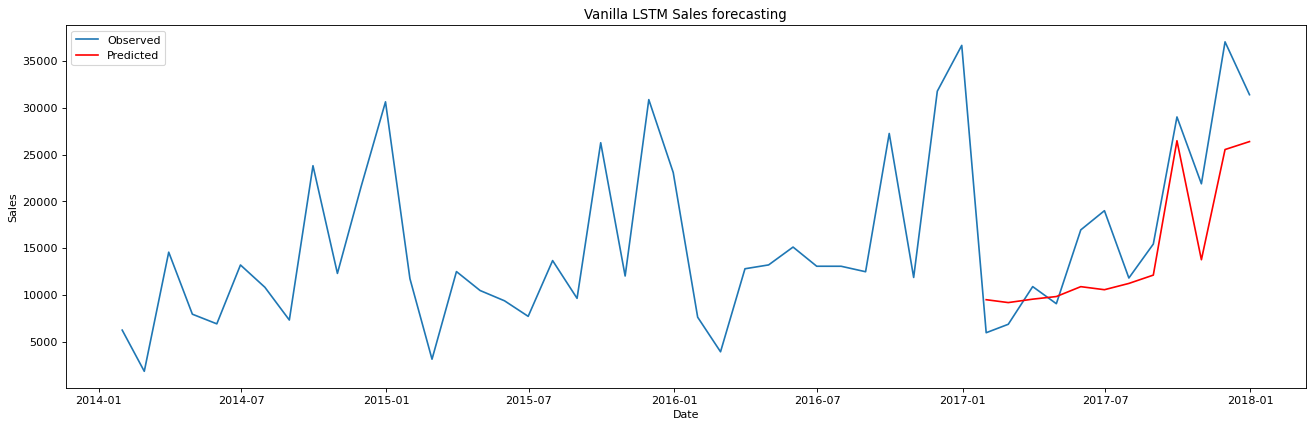

In [333]:
#Plot actual and predicted on the same graph

from matplotlib.pyplot import figure
figure(figsize = (20, 6), dpi = 80)
plt.plot(dataframe["Sales"], label="Observed")
plt.plot(plotting_df["yhat"], label="Predicted", color='r')
plt.legend(loc="upper left")

#Labelling 
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Vanilla LSTM Sales forecasting")

#Display
plt.savefig('vanilla_lstm.png')
plt.show()

In [331]:
model.save('vanilla_lstm.h5')

Stacked LSTM

In [238]:
model = Sequential()
model.add(LSTM(units=32, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))  
model.add(LSTM(units=32, activation='relu'))
model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 12, 32)            4352      
                                                                 
 lstm_44 (LSTM)              (None, 32)                8320      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [239]:
model.fit(generator,epochs=200)

Epoch 1/200
24/24 [==============================] - 4s 10ms/step - loss: 0.1393
Epoch 2/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0698
Epoch 3/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0675
Epoch 4/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0726
Epoch 5/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0642
Epoch 6/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0649
Epoch 7/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0667
Epoch 8/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0649
Epoch 9/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0633
Epoch 10/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0682
Epoch 11/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0638
Epoch 12/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0673
Epoch 13/200
24/24 [=====

24/24 [==============================] - 0s 14ms/step - loss: 0.0120
Epoch 102/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0096
Epoch 103/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0118
Epoch 104/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 105/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 106/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 107/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 108/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0118
Epoch 109/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 110/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 111/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0081
Epoch 112/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 113/200
24/2

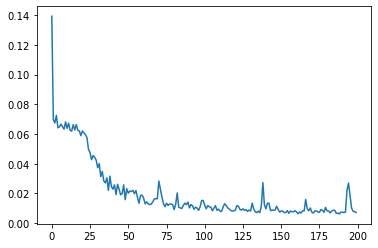

In [240]:
#Plot the loss per epoch
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [241]:
#Use trained model to make predictions on test data
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(scaled_test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 28ms/step


In [242]:
#Unscale the predictions on the test set
true_predictions = scaler.inverse_transform(test_predictions)

In [302]:
#Evalute performance
evaluation_df = df_lstm_test.copy()
evaluation_df.reset_index(drop=True, inplace=True) 

evaluation_df['yhat'] = true_predictions

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mse = mean_squared_error(evaluation_df["Sales"],evaluation_df["yhat"])
rmse = mean_squared_error(evaluation_df["Sales"],evaluation_df["yhat"], squared=False)
mape = mean_absolute_percentage_error(evaluation_df["Sales"],evaluation_df["yhat"])
print("MSE:", mse, "RMSE:", rmse, "MAPE:", mape)

MSE: 23642783.561619986 RMSE: 4862.384555094341 MAPE: 0.24312300848847798


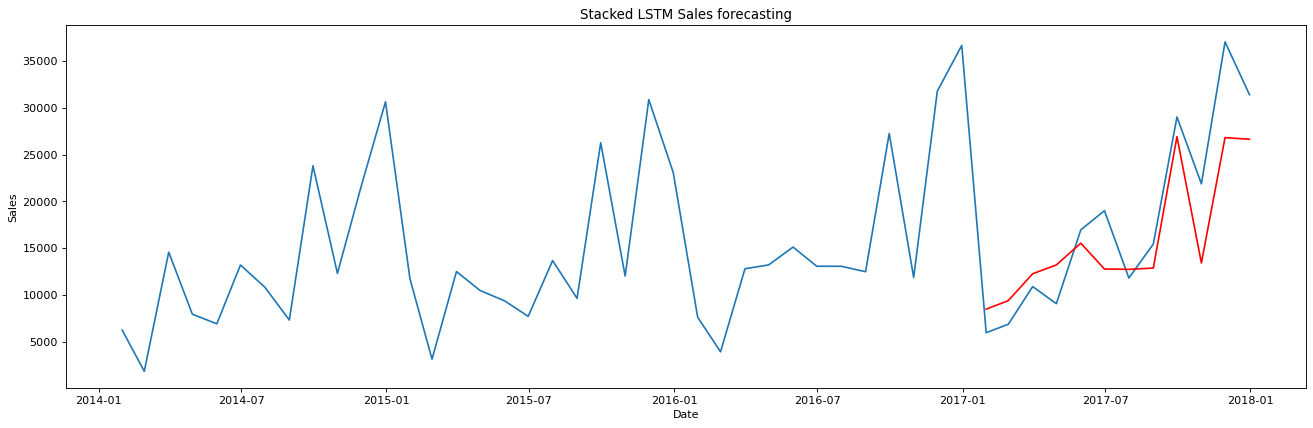

In [303]:
plotting_df = df_lstm_test.copy()
plotting_df['yhat'] = true_predictions
plotting_df.drop("Sales", axis=1, inplace=True)

#Plot actual and predicted on the same graph

from matplotlib.pyplot import figure
figure(figsize = (20, 6), dpi = 80)
plt.plot(dataframe["Sales"])
plt.plot(plotting_df["yhat"], color='r')

#Labelling 
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Stacked LSTM Sales forecasting")

#Display
plt.savefig('stacked_lstm.png')
plt.show()

In [245]:
model.save('stacked_lstm.h5')

<Figure size 432x288 with 0 Axes>